<style>
    body {margin-left: 10%; margin-right: 10%}
</style>
<div id="titulo" style="text-align: center">
    <h2>PTC3567 - Ciência dos Dados em Automação e Engenharia</h2>
    <h1>Predição do resultado de partidas de Dota 2</h1>
    <h3>Grupo 14</h3>
</div>
<br><br>
<div style="text-align: right">
    <h4>Tomáz Antonio Bortoletto Giansante - N°USP 10857342</h4>
    <h4>Vinícius Nardelli Santiago - N°USP 8758897</h4>
</div>

<div style="margin-left: 10%; margin-right: 10%;">
    <h4>Índice</h4>
    <ol>
        <li><a href="#dota2">DOTA 2</a>
        <li><a href="#ockham">A Navalha de Ockham e Aprendizado de Máquina</a>
        <li><a href="#dataset">O dataset</a>
        <li><a href="#random_forest">Random Forest Classifier</a>
            <ol>
                <li><a href="#rf_intro">Introdução</a></li>
                <ol>
                    <li><a href="#rf_como_funciona">Como Funciona</a></li>
                    <li><a href="#rf_vantagens">Vantagens</a></li>
                    <li><a href="#rf_desvantagens">Desvantagens</a></li>
                </ol>
                <li><a href="#rf_resultados">Resultados</a></li>
                <ol>
                    <li><a href="#rf_exemplo1">Random Forest com 50 árvores</a></li>
                    <li><a href="#rf_exemplo2">Random Forest com 100 árvores</a></li>
                    <li><a href="#rf_exemplo3">Random Forest com 220 árvores</a></li>
                    <li><a href="#rf_exemplo4">Random Forest com 220 árvores e altura máxima de 8</a></li>
                    <li><a href="#rf_exemplo5">Random Forest com 220 árvores e altura máxima de 3</a></li>
                    <li><a href="#rf_exemplo6">Random Forest com 220 árvores somente com heróis</a></li>
                    <li><a href="#rf_exemplo7">Random Forest com 220 árvores somente com as estatísticas de 'xp' e 'gold'</a></li>
                </ol>
            </ol>
        </li>
        <li><a href="#knn">K-Nearest Neighbor Classifier</a>
            <ol>
                <li><a href="#knn_intro">Introdução</a></li>
                <ol>
                    <li><a href="#knn_como_funciona">Como Funciona</a></li>
                    <li><a href="#knn_vantagens">Vantagens</a></li>
                    <li><a href="#knn_desvantagens">Desvantagens</a></li>
                </ol>
                <li><a href="#knn_resultados">Resultados</a></li>
                <ol>
                    <li><a href="#knn_exemplo1">KNN com K=1</a></li>
                    <li><a href="#knn_exemplo2">KNN com K=75</a></li>
                    <li><a href="#knn_exemplo3">KNN com K=114</a></li>
                    <li><a href="#knn_exemplo4">KNN com K=191</a></li>
                    <li><a href="#knn_exemplo5">KNN com K=249</a></li>
                    <li><a href="#knn_exemplo6">KNN com K=114 somente com heróis</a></li>
                    <li><a href="#knn_exemplo7">KNN com K=114 somente com as estatísticas de 'xp' e 'gold'</a></li>
                </ol>
            </ol>
        </li>
        <li><a href="#svc">Suport Vector Classifier</a>
            <ol>
                <li><a href="#svc_intro">Introdução</a></li>
                <ol>
                    <li><a href="#svc_como_funciona">Como Funciona</a></li>
                    <li><a href="#svc_vantagens">Vantagens</a></li>
                    <li><a href="#svc_desvantagens">Desvantagens</a></li>
                </ol>
                <li><a href="#svc_resultados">Resultados</a></li>
                <ol>
                    <li><a href="#svc_exemplo1">SVC com kernel='linear'</a></li>
                    <li><a href="#svc_exemplo2">SVC com kernel='poly'</a></li>
                    <li><a href="#svc_exemplo3">SVC com kernel='rbf'</a></li>
                    <li><a href="#svc_exemplo4">SVC com kernel='sigmoid'</a></li>
                    <li><a href="#svc_exemplo5">SVC com kernel='rbf' somente com heróis</a></li>
                    <li><a href="#svc_exemplo6">SVC com kernel='rbf' somente com as estatísticas de 'xp' e 'gold'</a></li>
                </ol>
            </ol>
        </li>
    </ol>
</div>


<h2 id="dota2">DOTA 2</h2>

<figure style="text-align: center; margin-left: 5%; margin-right: 5%;">
  <img src="notebook_src\dota2.jfif" alt="Dota2">
</figure>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>Desenvolvido pela Valve Corporation lançado em julho de 2013.</p>
    <p>Dois times de 5 jogadores que têm o objetivo de defender a base do time no mapa e atacar a do time adversário. Cada jogador controla um personagem chamado de herói. Acaba quando um time destrói o Ancestral, localizado na base adversária. Em setembro de 2022, média +790 mil jogadores simultâneos.</p>
     <p>O objetivo desse trabalho é tentar criar um algorítimo para prever o resultado das partidas de Dota 2. Os dados das partidas são publicos mas não existe uma maneira de simplesmente baixar um dataset diretamente. Devido a esse problema vamos criar o nosso próprio dataset.</p>
     <p>Coletamos os dados para o nosso dataset através da <a href="https://www.opendota.com/">OpenDota API</a>. Devido a limites da API de 60 Chamadas por minuto, era necessário colocar um delay entre cada chamada.</p>
     <p>Para extrair os dados criamos um script extract_data.py que inicialmente extraia uma lista de 100 partidas, depois extraia um json de cada partida individualmente.</p>
</div>

<figure style="text-align: center">
  <img src="notebook_src\flowchart.jfif" alt="O processo de contruir o dataset">
  <figcaption>O processo de contruir o dataset</figcaption>
</figure>

<div style="text-align: right"><a href="#titulo">[Topo]</a></div>

___
<h2 id="ockham">A Navalha de Ockham e Aprendizado de Máquina</h2>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>Os dados que recebiamos da API tinham características demais que tentar usufruir de todas seria um problema. Quando se tem muitos paramâmetros, o erro pode aumentar do que diminuir apesar da abundância de dados. A Navalha de Ockham descreve que quando se tem duas teorias para se fazer as mesmas predições, a mais simple é a que deve resultar em melhores resultados. Então descrever uma partida de Dota 2 como dois times de cincos heroís cada é a melhor maneira de descrever.</p>
</div>

<figure style="text-align: center">
  <img src="notebook_src\pareto.png" alt="Pareto">
</figure>

<div style="text-align: right"><a href="#titulo">[Topo]</a></div>

___
<h2 id="dataset">O Dataset</h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from requests import get

In [2]:
data = pd.read_csv("Dota2MatchesData.csv", index_col=0)
data.iloc[:,:9].head()

match_id  radiant_win  duration           start_time  region  \
0  6816664472        False      2927  2022-10-21 21:50:10       2   
1  6856249989        False      3576  2022-11-10 16:29:44       2   
2  6846977603         True       485  2022-11-06 01:49:00      25   
3  6818391895        False      2285  2022-10-22 21:03:29       9   
4  6818600136        False      2098  2022-10-23 01:59:59       8   

   radiant_gold_adv  radiant_xp_adv  dire_score  radiant_score  
0               115           -2908          38             46  
1             -8957          -14970          47             49  
2              6624            2507           6              5  
3            -25006          -35945          39             27  
4            -30161          -40317          47             18

In [3]:
win_lose = data['radiant_win'].value_counts()
win_pct = win_lose/len(data)
print(f"Vitórias time Radiant: {win_pct[1]:.2%}\nVitórias time Dire: {win_pct[0]:.2%}\n")
print(f"Diferença: {abs((win_pct[1]-win_pct[0])):.2%}")

Vitórias time Radiant: 49.34%
Vitórias time Dire: 50.66%

Diferença: 1.32%


<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>Podemos ver que um a diferença de vitórias é de 1.32% entre os times, ou seja, temos um jogo bem equilibrado já que esperado era 50% para cada time.</p>
    <p>Vamos fazer um histograma da distribuição de tempo das partidas baseado no time ganhador.</p>
</div>

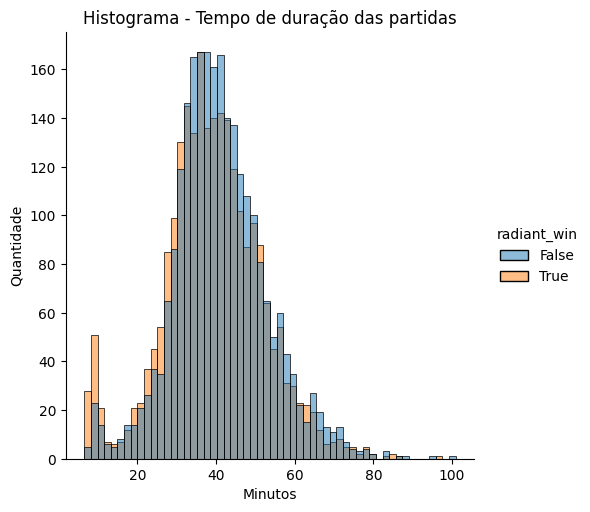

<Figure size 1200x2000 with 0 Axes>

In [4]:
data['minutos'] = data['duration']/60
sns.displot(data=data, x='minutos', hue='radiant_win')
plt.title('Histograma - Tempo de duração das partidas')
plt.xlabel('Minutos')
plt.ylabel('Quantidade')
plt.figure(figsize=(12,20))
plt.show()

In [5]:
url = "https://api.opendota.com/api/constants/region"
region_data = get(url)
region_df = pd.DataFrame(data=region_data.json(),index=[0])
region_df

1        2       3          5      6          7          8        9  \
0  US WEST  US EAST  EUROPE  SINGAPORE  DUBAI  AUSTRALIA  STOCKHOLM  AUSTRIA   

       10           11  ...     14    15     16                    17  \
0  BRAZIL  SOUTHAFRICA  ...  CHILE  PERU  INDIA  PW TELECOM GUANGDONG   

                    18     19                20                 25      37  \
0  PW TELECOM ZHEJIANG  JAPAN  PW TELECOM WUHAN  PW UNICOM TIANJIN  TAIWAN   

          38  
0  ARGENTINA  

[1 rows x 22 columns]

In [6]:
regiao = data['region'].value_counts()
regiao

3     1685
2     1176
5      713
8      345
1      278
10     214
9      164
13      68
7       62
20      61
15      61
19      42
25      35
11      32
38      26
18      13
17      10
6        9
14       5
16       1
Name: region, dtype: int64

In [7]:
region_dict = {}
for key, value in region_df.iteritems():
    try:
        region_dict[f'{region_df.loc[0,key]}'] = int(regiao[int(key)])
        print(key, 'Valid Region')
    except:
        print(key,'Invalid Region')

regiao_series = pd.Series(region_dict)

1 Valid Region
2 Valid Region
3 Valid Region
5 Valid Region
6 Valid Region
7 Valid Region
8 Valid Region
9 Valid Region
10 Valid Region
11 Valid Region
12 Invalid Region
13 Valid Region
14 Valid Region
15 Valid Region
16 Valid Region
17 Valid Region
18 Valid Region
19 Valid Region
20 Valid Region
25 Valid Region
37 Invalid Region
38 Valid Region


C:\Users\vinic\AppData\Local\Temp\ipykernel_6524\4120728836.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in region_df.iteritems():


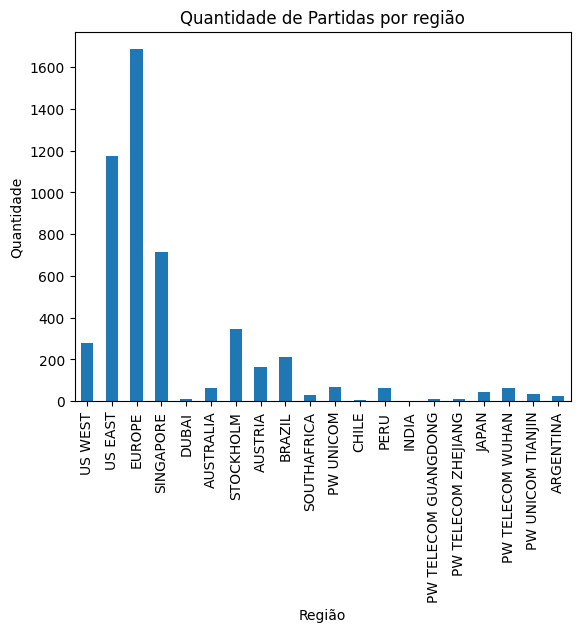

<Figure size 2000x1200 with 0 Axes>

In [8]:
regiao_series.plot.bar()
plt.title("Quantidade de Partidas por região")
plt.xlabel("Região")
plt.ylabel("Quantidade")
plt.figure(figsize=(20,12))
plt.show()

In [9]:
heros = data.iloc[:,9:-1]
count = heros.abs().cumsum()
count = count.iloc[-1:]
count = count.iloc[:, np.argsort(count.iloc[0])]
count = count[count.columns[::-1]]

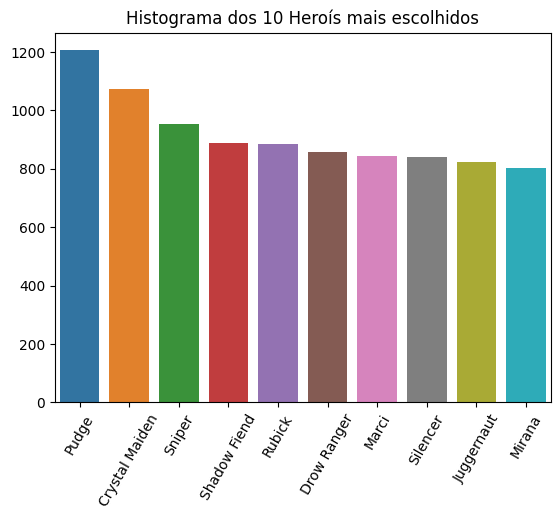

<Figure size 2000x1200 with 0 Axes>

In [10]:
sns.barplot(data=count.iloc[:, :10])
plt.title("Histograma dos 10 Heroís mais escolhidos")
plt.xticks(rotation=60)
plt.figure(figsize=(20,12))
plt.show()

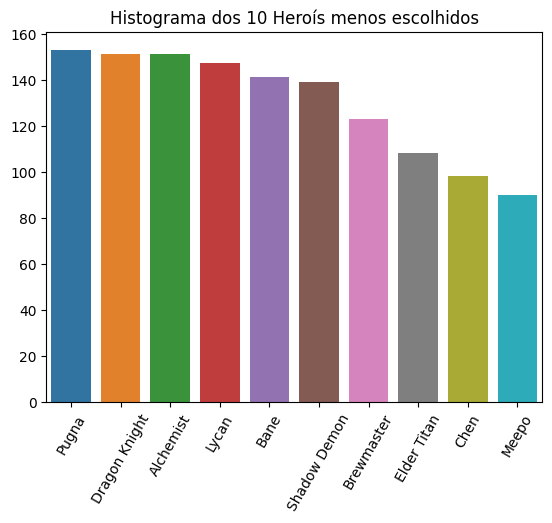

<Figure size 2000x1200 with 0 Axes>

In [11]:
sns.barplot(data=count.iloc[:, -10:])
plt.title("Histograma dos 10 Heroís menos escolhidos")
plt.xticks(rotation=60)
plt.figure(figsize=(20,12))
plt.show()

<div style="text-align: right"><a href="#titulo">[Topo]</a></div>

___
<h2 id="random_forest">Random Forest Classifier</h2>

<h3 id="rf_intro">Introdução</h3>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>Random Forest é um algoritmo de aprendizado supervisionado. Pode ser usado tanto para classificação como para regressão. Quanto maior o número de ávores numa floresta, mais robusta ela é. Ela é composta por árvores de decisão criadas a partir de amostras aleatórias da base de dados. Cada árvore gera uma classificação e, por meio de votação, a classificação da floresta é decidida. Também pode ser usada como um indicador de importância de cada feature.</p>
</div>

<figure style="text-align: center">
  <img src="notebook_src\rf_árvore_de_decisão.png" alt="Exemplo de Árvore de Decisão">
  <figcaption>Figura mostra um exemplo de árvore de decisão para ir à praia</figcaption>
</figure>

<h4 id="rf_como_funciona">Como Funciona</h4>

<div style="text-align: justify; margin-left: 10%; margin-right: 10%;">
    <p>Funciona em 4 passos</p>
    <ol>
        <li>Seleciona amostras aleatórias dos dados de treino</li>
        <li>Contrói uma árvore de decisão para cada amostra e calcula o resultado de predição pra cada árvore</li>
        <li>Para cada resultado, um voto é contabilizado</li>
        <li>A classificação com mais votos e a classificação final</li>
    </ol>
</div>

<figure style="text-align: center">
  <img src="notebook_src\rf_voting.jpg" alt="Random Forest Votação">
  <figcaption>Figura mostra o processo de amostragem e votação numa random forest</figcaption>
</figure>

<h4 id="rf_vantagens">Vantagens</h4>

<div style="text-align: justify; margin-left: 10%; margin-right: 10%;">
    <ul>
        <li>Random Forests são consideradas altamente acuradas e robustas por causa do alto número de árvores de decisão participando do processo.</li>
        <li>Não sofre overffitting. Como elas fazem uma média de todas as predições, os viéses se cancelam.</li>
        <li>São usadas para problemas de classificação e regressão.</li>
        <li>Conseguem lidar com valores faltantes. Ou usando a mediana para substituir variáveis contínuas ou calcular uma média ponderada dos valores próximos.</li>
        <li>Se pode obter a importância relativa entre as features do dataset</li>
    </ul>
</div>

<h4 id="rf_desvantagens">Desvantagens</h4>

<div style="text-align: justify; margin-left: 10%; margin-right: 10%;">
    <ul>
        <li>Por causa do alto número de árvores, leva um certo tempo para calcullar e somar os votos</li>
        <li>É mais difícil de interpretar em comparação à árvore de decisão</li>
    </ul>
</div>


<p style="text-align: right">Fonte: <a href="https://www.datacamp.com/tutorial/random-forests-classifier-python">Understanding Random Forests Classifiers in Python Tutorial</a></p>


<h3 id="rf_resultados">Resultados</h3>

In [12]:
from RandomForestClassifier.train_classifier import main as random_forest_main

<h4 id="rf_exemplo1">Random Forest com 50 árvores</h4>

In [13]:
_ = random_forest_main(number_of_trees=50, random_state=42,
                       metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        715         │         27         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         25         │        733         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.533%
	Precision: 96.622%
	Recall: 96.361%
	F1 Score: 96.491%


<h4 id="rf_exemplo2">Random Forest com 100 árvores</h4>

In [14]:
_ = random_forest_main(number_of_trees=100, random_state=42,
                       metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        716         │         26         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         24         │        734         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.667%
	Precision: 96.757%
	Recall: 96.496%
	F1 Score: 96.626%


<h4 id="rf_exemplo3">Random Forest com 220 árvores</h4>

In [15]:
_ = random_forest_main(number_of_trees=220, random_state=42,
                       metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        717         │         25         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         22         │        736         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.867%
	Precision: 97.023%
	Recall: 96.631%
	F1 Score: 96.826%


<h4 id="rf_exemplo4">Random Forest com 220 árvores e altura máxima de 8</h4>

In [16]:
_ = random_forest_main(number_of_trees=250, max_tree_depth=8, random_state=42,
                       metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        716         │         26         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         21         │        737         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.867%
	Precision: 97.151%
	Recall: 96.496%
	F1 Score: 96.822%


<h4 id="rf_exemplo5">Random Forest com 220 árvores e altura máxima de 3</h4>

In [17]:
_ = random_forest_main(number_of_trees=220, max_tree_depth=3, random_state=42,
                       metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        706         │         36         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         16         │        742         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.533%
	Precision: 97.784%
	Recall: 95.148%
	F1 Score: 96.448%


<h4 id="rf_exemplo6">Random Forest com 220 árvores somente com heróis</h4>
<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%; margin-top: 24px;">
    <p>Neste exemplo, treinaremos o algoritmo somente com os heróis usados por cada time como entrada. Os dados de quantidade de ouro e de experiência ganha por cada time não serão levados em conta.</p>
</div>

In [18]:
_ = random_forest_main(number_of_trees=220, random_state=42,
                       metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'),
                       drop_columns=('duration', 'start_time', 'region', 'radiant_gold_adv','radiant_xp_adv', 
                                     'dire_score', 'radiant_score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        373         │        369         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │        320         │        438         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 54.067%
	Precision: 53.824%
	Recall: 50.270%
	F1 Score: 51.986%


<h4 id="rf_exemplo7">Random Forest com 220 árvores somente com as estatísticas de 'xp' e 'gold'</h4>
<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%; margin-top: 24px;">
    <p>Agora, faremos o contrário do exemplo anterior: usaremos somente as quantidades de ouro e de experiência ganha por cada time.</p>
</div>

In [19]:
_ = random_forest_main(number_of_trees=220, random_state=42, heroes=False,
                       metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        718         │         24         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         20         │        738         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 97.067%
	Precision: 97.290%
	Recall: 96.765%
	F1 Score: 97.027%


<div style="text-align: right"><a href="#titulo">[Topo]</a></div>

___
<h2 id="knn">K-Nearest Neighbor Classifier</h2>

<h3 id="knn_intro">Introdução</h3>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>KNN é um dos algoritmos mais usados em aprendizado de máquina, sendo fácil de entender, bastante versátil e simples. É usado tanto para problemas de classificação quanto para de regressão. Ele é baseado na abordagem de similaridade de features. </p>
</div>

<h4 id="knn_como_funciona">Como Funciona</h4>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>O parâmetro K é um número inteiro e significa a quantidade de vizinhos que serão considerados. Suponha que temos um ponto em amarelo que queremos prever a qual classe ele pertence e que K=1. Primeiro, achamos o ponto mais próximo ao amarelo, depois atribuimos a classe desse ponto achado ao ponto amarelo.</p>
</div>

<figure style="text-align: center">
  <img src="notebook_src\knn_imagem1.jpg" alt="Exemplo KNN">
  <figcaption>Exemplo do algoritmo funcionando com K=1</figcaption>
</figure>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>Para K=N, fazemos o mesmo procedimento. Primeiro achamos os K prontos mais próximos do ponto que queremos classificar, a classe que tiver mais pontos dentre esses N, será a classe atribuida ao novo ponto. A distância pode ser calculada de várias maneiras: como a euclidiana, de Hamming, Manhattan, de Minkowski... </p>
</div>

<figure style="text-align: center">
  <img src="notebook_src\knn_imagem3.jpg" alt="Passos do KNN">
  <figcaption>Passo a passo do algoritmo</figcaption>
</figure>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>Esse algoritmo é bastante dependente do parâmetro K. Como vemos na figura abaixo, a classificação pode mudar dependendo do K escolhido.</p>
    <p>Porém, não existe um valor ótimo para todos os casos. O valor ótimo de K depende de cada dataset.</p>
</div>

<figure style="text-align: center">
  <img src="notebook_src\knn_imagem2.jpg" alt="KNN com Diferentes Ks">
  <figcaption>KNN com Diferentes valores para K</figcaption>
</figure>

<h4 id="knn_vantagens">Vantagens</h4>

<div style="text-align: justify; margin-left: 10%; margin-right: 10%;">
    <ul>
        <li>O treino desse modelo é muito mais rápido comparado a outros algoritmos</li>
        <li>Pode ser usado em casos não lineares</li>
        <li>Funciona para problemas de regressão, sendo que a saída é a média dos vizinhos mais próximos</li>
    </ul>
</div>

<h4 id="knn_desvantagens">Desvantagens</h4>

<div style="text-align: justify; margin-left: 10%; margin-right: 10%;">
    <ul>
        <li>Requer bastante memória para armazenar todos os pontos, por isso não é recomendado para datasets grandes</li>
        <li>A fase de teste pode ser demorada por ter que calcular as distâncias pra cada ponto do dataset</li>
    </ul>
</div>


<p style="text-align: right">Fonte: <a href="https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn">KNN Classification Tutorial using Scikit-learn</a></p>


<h3 id="knn_resultados">Resultados</h3>

In [20]:
from KNearestNeighborsClassifier.train_classifier import main as knn_main

<h4 id="knn_exemplo1">KNN com K=1</h4>

In [21]:
_ = knn_main(n_neighbors=1, random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        494         │        248         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │        160         │        598         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 72.800%
	Precision: 75.535%
	Recall: 66.577%
	F1 Score: 70.774%


<h4 id="knn_exemplo2">KNN com K=75</h4>

In [22]:
_ = knn_main(n_neighbors=75, random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        673         │         69         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         28         │        730         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 93.533%
	Precision: 96.006%
	Recall: 90.701%
	F1 Score: 93.278%


<h4 id="knn_exemplo3">KNN com K=114</h4>

In [23]:
_ = knn_main(n_neighbors=114, random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        708         │         34         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         14         │        744         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.800%
	Precision: 98.061%
	Recall: 95.418%
	F1 Score: 96.721%


<h4 id="knn_exemplo4">KNN com K=191</h4>

In [24]:
_ = knn_main(n_neighbors=191, random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        671         │         71         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         26         │        732         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 93.533%
	Precision: 96.270%
	Recall: 90.431%
	F1 Score: 93.259%


<h4 id="knn_exemplo5">KNN com K=249</h4>

In [25]:
_ = knn_main(n_neighbors=249, random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        546         │        196         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         35         │        723         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 84.600%
	Precision: 93.976%
	Recall: 73.585%
	F1 Score: 82.540%


<h4 id="knn_exemplo6">KNN com K=114 somente com heróis</h4>
<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%; margin-top: 24px;">
    <p>Neste exemplo, como feito no algoritmo de 'Random Forest Classifier', treinaremos o algoritmo somente com os heróis usados por cada time como entrada. Os dados de quantidade de ouro e de experiência ganha por cada time não serão levados em conta. Usaremos k=114, porque foi o que resultou em maior acurácia:</p>
</div>

In [26]:
_ = knn_main(n_neighbors=25, random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'),
             drop_columns=('duration', 'start_time', 'region', 'radiant_gold_adv','radiant_xp_adv',
                           'dire_score', 'radiant_score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        274         │        468         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │        246         │        512         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 52.400%
	Precision: 52.692%
	Recall: 36.927%
	F1 Score: 43.423%


<h4 id="knn_exemplo7">KNN com K=114 somente com as estatísticas de 'xp' e 'gold'</h4>
<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%; margin-top: 24px;">
    <p>Agora, usaremos somente as quantidades de ouro e de experiência ganha por cada time.</p>
</div>

In [27]:
_ = knn_main(n_neighbors=25, random_state=42, heroes=False,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        716         │         26         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         18         │        740         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 97.067%
	Precision: 97.548%
	Recall: 96.496%
	F1 Score: 97.019%


<div style="text-align: right"><a href="#titulo">[Topo]</a></div>

___
<h2 id="svc">Support Vector Classifier</h2>

<h3 id="svc_intro">Introdução</h3>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>Geralmente o Support Vector Machines é usado em problemas de classificação. O SVM constroi um hiperplano que separa as classes umas das outras. Ele gera o hiperplano ótimo iteradamente de modo a minimizar o erro, maximizando a margem que separa as classes.</p>
</div>

<h4 id="svc_como_funciona">Como Funciona</h4>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>O objetivo principal do algoritmo é separar os dados do melhor jeito possível. A distância entre dois pontos próximos é chamada de margem. O objetivo é achar um hyperplano com a maior margem possível.</p>
    <p>Primeiro, ele gera hiperplanos que separam as classes. Na figura abaixo, os planos azul e larnja tem um erro maior que o preto. Assim, ele seleciona o hiperplano com a maior separação (no caso o preto).</p>
</div>

<figure style="text-align: center">
  <img src="notebook_src\svc_imagem1.jpg" alt="Passos do SVM">
  <figcaption>O SVM gera vários hiperplanos e seleciona o com menor erro</figcaption>
</figure>

<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%;">
    <p>No caso em que a divisão não é possível por um hyperplano, o SVM usa um kernel para transformar o espaço das entradas para um de maior dimensão. Como a figura abaixo mostra, no plano xy não é possível a separação. Mas se adicionarmos a dimensão z (z=x²+y²), os dados ficam separáveis</p>
</div>

<figure style="text-align: center">
  <img src="notebook_src\svc_imagem2.jpg" alt="SVM e o uso do kernel">
  <figcaption >Com a dimensão z, os dados ficam separáveis por um hyperplano</figcaption>
</figure>

<h4 id="svc_vantagens">Vantagens</h4>

<div style="text-align: justify; margin-left: 10%; margin-right: 10%;">
    <ul>
        <li>Proporciona uma boa acurácia e é rápido na predição em comparação a outros modelos</li>
        <li>Usa pouca memória na fase de treinamento</li>
    </ul>
</div>

<h4 id="svc_desvantagens">Desvantagens</h4>

<div style="text-align: justify; margin-left: 10%; margin-right: 10%;">
    <ul>
        <li>Não é indicado para dataset muito grande, pois pode demorar no treinamento</li>
        <li>Não funciona bem em datasets cujas classes se sobrepõem</li>
        <li>Bastante sensível ao kernel escolhido</li>
    </ul>
</div>


<p style="text-align: right">Fonte: <a href="https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python">Support Vector Machines with Scikit-learn Tutorial</a></p>


<h3 id="svc_resultados">Resultados</h3>

In [28]:
from SupportVectorClassifier.train_classifier import main as svc_main

<h4 id="svc_exemplo1">SVC com kernel='linear'<h4>

In [29]:
_ = svc_main(kernel='linear', random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        716         │         26         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         25         │        733         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.600%
	Precision: 96.626%
	Recall: 96.496%
	F1 Score: 96.561%


<h4 id="svc_exemplo2">SVC com kernel='poly'<h4>

In [30]:
_ = svc_main(kernel='poly', random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        653         │         89         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         24         │        734         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 92.467%
	Precision: 96.455%
	Recall: 88.005%
	F1 Score: 92.037%


<h4 id="svc_exemplo3">SVC com kernel='rbf'<h4>

In [31]:
_ = svc_main(kernel='rbf', random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        715         │         27         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         21         │        737         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.800%
	Precision: 97.147%
	Recall: 96.361%
	F1 Score: 96.752%


<h4 id="knn_exemplo4">SVC com kernel='sigmoid'<h4>

In [32]:
_ = svc_main(kernel='sigmoid', random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        716         │         26         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         17         │        741         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 97.133%
	Precision: 97.681%
	Recall: 96.496%
	F1 Score: 97.085%


<h4 id="knn_exemplo5">SVC com kernel='sigmoid' somente com heróis</h4>
<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%; margin-top: 24px;">
    <p>Neste exemplo, como feito nos algoritmos danteriores, treinaremos somente com os heróis usados por cada time como entrada. Usaremos como kernel o 'sigmoid'</p>
</div>

In [33]:
_ = svc_main(kernel='sigmoid', random_state=42,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'),
             drop_columns=('duration', 'start_time', 'region', 'radiant_gold_adv','radiant_xp_adv',
                           'dire_score', 'radiant_score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        369         │        373         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │        297         │        461         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 55.333%
	Precision: 55.405%
	Recall: 49.730%
	F1 Score: 52.415%


<h4 id="knn_exemplo6">SVC com kernel='sigmoid' somente com as estatísticas de 'xp' e 'gold'</h4>
<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%; margin-top: 24px;">
    <p>Agora, usaremos somente as quantidades de ouro e de experiência ganhas por cada time.</p>
</div>

In [34]:
_ = svc_main(kernel='sigmoid', random_state=42, heroes=False,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │         42         │        700         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │        105         │        653         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 46.333%
	Precision: 28.571%
	Recall: 5.660%
	F1 Score: 9.449%


<div style="text-align: justify; text-indent: 10%; margin-left: 10%; margin-right: 10%; margin-top: 24px;">
    <p>Como pode-se ver, o modelo não conseguiu prever bem o ganhador das partidas usando somente os dados de '<i>xp</i>' e '<i>gold</i>'.</p>
    <p>Já que esse algoritmo, o SVC, é bastante sensível quantto aos tipos de kenel utilizados, vamos treiná-lo com os tipos '<i>linear</i>', '<i>poly</i>' e '<i>rbf</i>':</p>
</div>

In [35]:
_ = svc_main(kernel='linear', random_state=42, heroes=False,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        717         │         25         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         22         │        736         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.867%
	Precision: 97.023%
	Recall: 96.631%
	F1 Score: 96.826%


In [36]:
_ = svc_main(kernel='poly', random_state=42, heroes=False,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        715         │         27         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         20         │        738         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.867%
	Precision: 97.279%
	Recall: 96.361%
	F1 Score: 96.818%


In [37]:
_ = svc_main(kernel='rbf', random_state=42, heroes=False,
             metrics=('confusion matrix', 'accuracy', 'precision', 'recall', 'f1 score'))


                              ┌────────────────────┬────────────────────┐
                              │ Predicted Radiant  │   Predicted Dire   │
            ┌─────────────────┼────────────────────┼────────────────────┤
            │   Radiant Won   │        716         │         26         │
            ├─────────────────┼────────────────────┼────────────────────┤
            │     Dire Won    │         21         │        737         │
            └─────────────────┴────────────────────┴────────────────────┘
    
	Accuracy: 96.867%
	Precision: 97.151%
	Recall: 96.496%
	F1 Score: 96.822%


<div style="text-align: right"><a href="#titulo">[Topo]</a></div>